# Introduction/Business Problem 

### Business Problem:
Franchise Owners of a certain restaurant are looking to expand to the city of Miami! This specific restaurant will have an outdoor seating area, bar and a mix of Cuban and American food. Where would the ideal location in Miami be for such a restaurant?

### Data:
In order to pick an appropriate location for a restaurant in Miami, we will need Data that includes:
- Nearby Venues (to determine foot traffic)
- Competitors in Area (bars and restaruants)
- Population Density
- Population Demographics

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
import geocoder
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## Loading Data and Preprocessing

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami")[0]
#Dropping last row in df because it is a total of all previous rows
df = df.drop([25,])
df.head()

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257


In [3]:
df.shape

(25, 6)

In [4]:
print(df.columns)
df.drop(columns = ['Demonym','Population/Km²','Sub-neighborhoods','Coordinates'], inplace = True)
df.head()

Index(['Neighborhood', 'Demonym', 'Population2010', 'Population/Km²',
       'Sub-neighborhoods', 'Coordinates'],
      dtype='object')


,Neighborhood,Population2010
0,Allapattah,54289
1,Arts & Entertainment District,11033
2,Brickell,31759
3,Buena Vista,9058
4,Coconut Grove,20076


In [5]:
df = df.rename(columns = {'Population2010' : 'Population'})
df.head()

,Neighborhood,Population
0,Allapattah,54289
1,Arts & Entertainment District,11033
2,Brickell,31759
3,Buena Vista,9058
4,Coconut Grove,20076


Now lets add the latitude and longitude for every neighborhood into out dataframe

In [6]:
def addlatlong(df):
    df['Latitude'] = ''
    df['Longitude'] = ''
    for i,row in enumerate(df.Neighborhood):
        area = row + str(', FL')
        g = geocoder.google(area, key = 'XXXXX')
        print(area,g.latlng[0], g.latlng[1])
        df.iloc[i,2] = g.latlng[0]
        df.iloc[i,3] = g.latlng[1]

addlatlong(df)
df.head()

Allapattah, FL 25.8003154 -80.22655449999999
Arts & Entertainment District, FL 25.8014685 -80.1990903
Brickell, FL 25.7601793 -80.1958755
Buena Vista, FL 28.3695351 -81.5261474
Coconut Grove, FL 25.7355248 -80.2377186
Coral Way, FL 25.7480415 -80.3156097
Design District, FL 25.8134218 -80.1934285
Downtown, FL 28.5491677 -81.3798095
Edgewater, FL 28.9888754 -80.9022758
Flagami, FL 25.7716696 -80.27951949999999
Grapeland Heights, FL 25.7902153 -80.25379459999999
Health District, FL 26.7520523 -80.0693189
Liberty City, FL 25.8317637 -80.2167149
Little Haiti, FL 25.8326937 -80.19620859999999
Little Havana, FL 25.7776438 -80.2377078
Lummus Park, FL 25.7809553 -80.12994789999999
Midtown, FL 30.4589877 -84.2736378
Overtown, FL 25.7839802 -80.2014543
Park West, FL 25.9846068 -80.20255829999999
The Roads, FL 25.7555556 -80.205
Upper Eastside, FL 25.830499 -80.18037079999999
Venetian Islands, FL 25.7920428 -80.1631021
Virginia Key, FL 25.7399644 -80.15681339999999
West Flagler, FL 25.7720352 -80

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.8003,-80.2266
1,Arts & Entertainment District,11033,25.8015,-80.1991
2,Brickell,31759,25.7602,-80.1959
3,Buena Vista,9058,28.3695,-81.5261
4,Coconut Grove,20076,25.7355,-80.2377


After examining the data in th epopulation column, we can see that indexes 7,16 and 21 need to be edited. Because the data is population, we can easily search the population of the given neighborhood of the year 2010. Once we get that information, we can maually put that information in!

In [7]:
print(df[['Neighborhood','Population']])

                     Neighborhood                Population
0                      Allapattah                     54289
1   Arts & Entertainment District                     11033
2                        Brickell                     31759
3                     Buena Vista                      9058
4                   Coconut Grove                     20076
5                       Coral Way                     35062
6                 Design District                      3573
7                        Downtown  71,000 (13,635 CBD only)
8                       Edgewater                     15005
9                         Flagami                     50834
10              Grapeland Heights                     14004
11                Health District                      2705
12                   Liberty City                     19725
13                   Little Haiti                     29760
14                  Little Havana                     76163
15                    Lummus Park       

In [8]:
df.iloc[7,1] = 71000
df.iloc[16,1] = 3162
df.iloc[21,1] = 100
print(df.head(24))

                     Neighborhood Population Latitude Longitude
0                      Allapattah      54289  25.8003  -80.2266
1   Arts & Entertainment District      11033  25.8015  -80.1991
2                        Brickell      31759  25.7602  -80.1959
3                     Buena Vista       9058  28.3695  -81.5261
4                   Coconut Grove      20076  25.7355  -80.2377
5                       Coral Way      35062   25.748  -80.3156
6                 Design District       3573  25.8134  -80.1934
7                        Downtown      71000  28.5492  -81.3798
8                       Edgewater      15005  28.9889  -80.9023
9                         Flagami      50834  25.7717  -80.2795
10              Grapeland Heights      14004  25.7902  -80.2538
11                Health District       2705  26.7521  -80.0693
12                   Liberty City      19725  25.8318  -80.2167
13                   Little Haiti      29760  25.8327  -80.1962
14                  Little Havana      7

Fix Location (Lat,Long) of neighborhoods to better map output

In [9]:
Midtown_loc = geocoder.google('Midtown, Miami, FL', key = 'XXXX')
Midtown_lat = Midtown_loc.latlng[0]
Midtown_lng = Midtown_loc.latlng[1]
df.loc[16,'Latitude'] = Midtown_lat
df.loc[16,'Longitude'] = Midtown_lng
#16


Edgewater_loc = geocoder.google('Edgewater, Miami, FL', key = 'XXXX')
Edgewater_lat = Edgewater_loc.latlng[0]
Edgewater_lng = Edgewater_loc.latlng[1]
df.loc[8,'Latitude'] = Edgewater_lat
df.loc[8,'Longitude'] = Edgewater_lng
#8

Downtown_loc = geocoder.google('Downtown, Miami, FL', key = 'XXXX')
Downtown_lat = Downtown_loc.latlng[0]
Downtown_lng = Downtown_loc.latlng[1]
df.loc[7,'Latitude'] = Downtown_lat
df.loc[7,'Longitude'] = Downtown_lng
#7

BuenaVista_loc = geocoder.google('Buena Vista, Miami, FL', key = 'XXXX')
BuenaVista_lat = BuenaVista_loc.latlng[0]
BuenaVista_lng = BuenaVista_loc.latlng[1]
df.loc[3,'Latitude'] = BuenaVista_lat
df.loc[3,'Longitude'] = BuenaVista_lng
#3

HealthDistrict_loc = geocoder.google('Health District, Miami, FL', key = 'XXXX')
HealthDistrict_lat = HealthDistrict_loc.latlng[0]
HealthDistrict_lng = HealthDistrict_loc.latlng[1]
df.loc[11,'Latitude'] = HealthDistrict_lat
df.loc[11,'Longitude'] = HealthDistrict_lng
#11

df.head()

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.8003,-80.2266
1,Arts & Entertainment District,11033,25.8015,-80.1991
2,Brickell,31759,25.7602,-80.1959
3,Buena Vista,9058,25.8132,-80.1917
4,Coconut Grove,20076,25.7355,-80.2377


In [10]:
df['Population'] = df['Population'].apply(pd.to_numeric)
df = df.sort_values(['Population'], ascending = False)
df = df.reset_index(drop = True)
df.head()

,Neighborhood,Population,Latitude,Longitude
0,Little Havana,76163,25.7776,-80.2377
1,Downtown,71000,25.7713,-80.1919
2,Allapattah,54289,25.8003,-80.2266
3,Flagami,50834,25.7717,-80.2795
4,Coral Way,35062,25.748,-80.3156


Lets Visualize our Neighborhoods on a map of Miami

In [11]:
import folium
Miami_loc = geocoder.google('Miami, FL', key = 'XXXX')
Miami_lat = Miami_loc.latlng[0]
Miami_lng = Miami_loc.latlng[1]

Miami = folium.Map(location=[Miami_lat, Miami_lng], zoom_start=12)

# Add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], 
                           df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(Miami)  
    
Miami

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

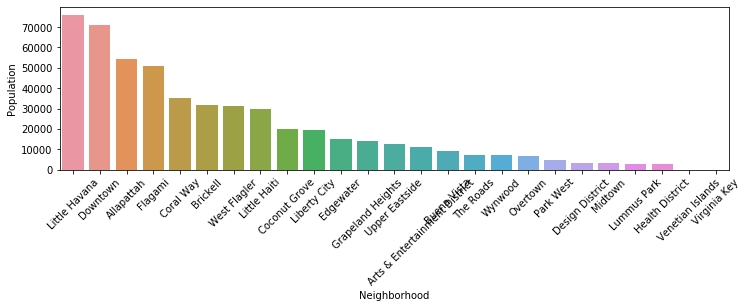

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,3))
sns.barplot(x = 'Neighborhood',y = 'Population', data = df)
plt.xticks(rotation = 45)

## FourSquare API Calls

Lets Declare our API Credentials 

In [13]:
CLIENT_ID = 'XXXX'
CLIENT_SECRET = 'XXXX'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0J2FOSURWFDDNWP0GNW2HYUHPM2U0BCZ14HB4IV2DLDQCZNS
CLIENT_SECRET:KL4DCGZKSAE0ZEVBELQLMTLIEGK1C2TZFCJAWY4ZWADMNO20


In [14]:
LIMIT = 100
def getVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Miami_venues = getVenues(names = df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'])
print(Miami_venues.shape)
Miami_venues.head()

(583, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Little Havana,25.777644,-80.237708,Artist & Craftsman Supply,25.779678,-80.239063,Arts & Crafts Store
1,Little Havana,25.777644,-80.237708,Don Pan,25.778408,-80.239545,Bakery
2,Little Havana,25.777644,-80.237708,Fritanga Caña Brava,25.779708,-80.234640,Latin American Restaurant
3,Little Havana,25.777644,-80.237708,Miami Smokers,25.775735,-80.239385,Comfort Food Restaurant
4,Little Havana,25.777644,-80.237708,Diana Bakery,25.779518,-80.233687,Bakery


After doing some data analysis, I foudnd that 3 entries in the dataframe had category of 'Neighborhood'. This would conflict with the Neighborhood column index further on. To prevent this, we are simply going to drop those 3 rows. 

In [15]:
Miami_venues = Miami_venues[~Miami_venues['Venue Category'].str.match('Neighborhood')]

In [16]:
# Take a look at how many venues were pulled for each Neighborhood
Miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,2,2,2,2,2,2
Arts & Entertainment District,99,99,99,99,99,99
Brickell,41,41,41,41,41,41
Buena Vista,28,28,28,28,28,28
Coconut Grove,31,31,31,31,31,31
Coral Way,3,3,3,3,3,3
Design District,25,25,25,25,25,25
Downtown,74,74,74,74,74,74
Edgewater,30,30,30,30,30,30


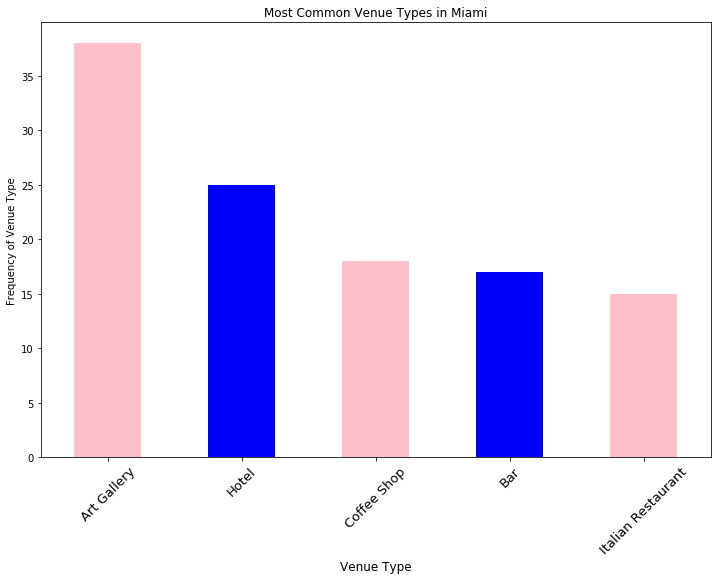

In [17]:
Miami_top_venues = Miami_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
Miami_top_venues = Miami_top_venues[['Venue Category','Neighborhood']]
Miami_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
Miami_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in Miami", rot= 45, figsize = (12, 8), color=['pink','blue'])
plt.ylabel('Frequency of Venue Type')
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in Miami')
plt.show()

It looks like most of the Miami area is filled with Art galleries and Hotels. This would put us in good standing to open a restaurant/bar without too much competition.

Now we will one hot encode the data for further analysis and data prep for machine learning

In [18]:
Miami_onehot = pd.get_dummies(Miami_venues[['Venue Category']], prefix = "", prefix_sep = "")

# Add city column back to dataframe
Miami_onehot['Neighborhood'] = Miami_venues['Neighborhood'] 

# Move city column to the first column
fixed_columns = [Miami_onehot.columns[-1]] + list(Miami_onehot.columns[:-1])
Miami_onehot = Miami_onehot[fixed_columns]

print(Miami_onehot.shape)
Miami_onehot.head()

(579, 153)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Thrift / Vintage Store,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,Little Havana,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Little Havana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Little Havana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Little Havana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Little Havana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Group the data by Neighborhood
Miami_grouped = Miami_onehot.groupby('Neighborhood').mean().reset_index()
print(Miami_grouped.shape)
Miami_grouped

(24, 153)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Thrift / Vintage Store,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,Allapattah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arts & Entertainment District,0.000000,0.000000,0.010101,0.000000,0.000000,0.191919,0.000000,0.000,0.020202,...,0.020202,0.010101,0.000000,0.020202,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000
2,Brickell,0.000000,0.000000,0.000000,0.000000,0.073171,0.000000,0.000000,0.000,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073171
3,Buena Vista,0.000000,0.000000,0.035714,0.035714,0.000000,0.035714,0.035714,0.000,0.035714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000
4,Coconut Grove,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000
5,Coral Way,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Design District,0.000000,0.000000,0.040000,0.040000,0.000000,0.040000,0.040000,0.000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Downtown,0.000000,0.013514,0.027027,0.000000,0.000000,0.000000,0.000000,0.000,0.013514,...,0.013514,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000
8,Edgewater,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333
9,Flagami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Lets take a look at the top 5 venues in each neighborhood!

In [20]:
num_top_venues = 5

for hood in Miami_grouped['Neighborhood']:
    print("----"+hood+"----")
    ##Transpose dataframe
    temp = Miami_grouped[Miami_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
                  venue  freq
0      Cuban Restaurant   0.5
1  Gym / Fitness Center   0.5
2          Optical Shop   0.0
3   Monument / Landmark   0.0
4                 Motel   0.0


----Arts & Entertainment District----
            venue  freq
0     Art Gallery  0.19
1             Bar  0.06
2  Ice Cream Shop  0.05
3      Restaurant  0.04
4      Food Truck  0.04


----Brickell----
                    venue  freq
0                   Hotel  0.17
1      Italian Restaurant  0.10
2             Yoga Studio  0.07
3  Argentinian Restaurant  0.07
4        Sushi Restaurant  0.05


----Buena Vista----
                venue  freq
0                Café  0.07
1            Boutique  0.07
2       Jewelry Store  0.07
3  Italian Restaurant  0.07
4      Ice Cream Shop  0.04


----Coconut Grove----
                venue  freq
0      Sandwich Place  0.06
1                 Bar  0.06
2  Salon / Barbershop  0.06
3  Frozen Yogurt Shop  0.03
4                 Gym  0.03


----Coral Way----
    

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['Neighborhood'] = Miami_grouped['Neighborhood']

for ind in np.arange(Miami_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Miami_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Allapattah,Cuban Restaurant,Gym / Fitness Center,Dive Shop,Fast Food Restaurant,Eye Doctor,Event Space,Empanada Restaurant,Electronics Store,Donut Shop,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio
1,Arts & Entertainment District,Art Gallery,Bar,Ice Cream Shop,Restaurant,Food Truck,Brewery,Coffee Shop,Café,Juice Bar,...,Public Art,Caribbean Restaurant,Beer Garden,Bakery,Clothing Store,Peruvian Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Mexican Restaurant
2,Brickell,Hotel,Italian Restaurant,Yoga Studio,Argentinian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Grocery Store,...,Cosmetics Shop,Mediterranean Restaurant,Lounge,Latin American Restaurant,Karaoke Bar,Japanese Restaurant,Coffee Shop,Smoke Shop,Tex-Mex Restaurant,Bank
3,Buena Vista,Café,Boutique,Jewelry Store,Italian Restaurant,Pizza Place,Bakery,Leather Goods Store,Coffee Shop,Fast Food Restaurant,...,Mediterranean Restaurant,Bistro,Big Box Store,Clothing Store,Resort,Art Gallery,Arepa Restaurant,Ice Cream Shop,Hobby Shop,American Restaurant
4,Coconut Grove,Salon / Barbershop,Bar,Sandwich Place,Donut Shop,Café,Pizza Place,Pharmacy,Dance Studio,Mobile Phone Shop,...,Mattress Store,Pet Store,Latin American Restaurant,Fast Food Restaurant,Food Truck,Frozen Yogurt Shop,Gas Station,Hotel,Hardware Store,Gym / Fitness Center
5,Coral Way,Pizza Place,Fast Food Restaurant,Intersection,Dive Shop,Eye Doctor,Event Space,Empanada Restaurant,Electronics Store,Donut Shop,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio
6,Design District,Italian Restaurant,Jewelry Store,Café,Boutique,Pizza Place,Big Box Store,Home Service,Ice Cream Shop,Furniture / Home Store,...,Mediterranean Restaurant,Coffee Shop,Clothing Store,Bistro,Hobby Shop,Asian Restaurant,Arepa Restaurant,Art Gallery,Art Museum,American Restaurant
7,Downtown,Hotel,Seafood Restaurant,Pharmacy,Cocktail Bar,Cosmetics Shop,Italian Restaurant,Residential Building (Apartment / Condo),Spa,Bar,...,French Restaurant,New American Restaurant,American Restaurant,Coffee Shop,Chinese Restaurant,Salon / Barbershop,Restaurant,Latin American Restaurant,Bistro,Nightclub
8,Edgewater,Gym,Sandwich Place,Restaurant,Coffee Shop,Gym / Fitness Center,Cuban Restaurant,Cupcake Shop,Peruvian Restaurant,Paper / Office Supplies Store,...,Spa,Mexican Restaurant,Juice Bar,Food Truck,French Restaurant,Furniture / Home Store,Greek Restaurant,Gun Range,Boutique,Yoga Studio
9,Flagami,Flower Shop,Pharmacy,Motel,Bakery,Donut Shop,Fast Food Restaurant,Eye Doctor,Event Space,Empanada Restaurant,...,Yoga Studio,Food,Dive Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Dog Run


## Clustering

In [23]:
# set number of clusters
kclusters = 5

Miami_grouped_clustering = Miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# Add clustering label
cities_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Miami_merged = df

In [25]:
Miami_merged = Miami_merged.join(cities_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [26]:
Miami_merged['Latitude'] = Miami_merged['Latitude'].astype(float)
Miami_merged['Longitude'] = Miami_merged['Longitude'].astype(float)
Miami_merged.iloc[24,4] = 0.0
Miami_merged['Cluster Label'] = Miami_merged['Cluster Label'].astype(int)
Miami_merged.head()

,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Little Havana,76163,25.777644,-80.237708,1,Bakery,Pharmacy,Comfort Food Restaurant,Latin American Restaurant,Arts & Crafts Store,...,Electronics Store,Donut Shop,Dog Run,Discount Store,Dive Shop,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio
1,Downtown,71000,25.771251,-80.191873,1,Hotel,Seafood Restaurant,Pharmacy,Cocktail Bar,Cosmetics Shop,...,French Restaurant,New American Restaurant,American Restaurant,Coffee Shop,Chinese Restaurant,Salon / Barbershop,Restaurant,Latin American Restaurant,Bistro,Nightclub
2,Allapattah,54289,25.800315,-80.226554,3,Cuban Restaurant,Gym / Fitness Center,Dive Shop,Fast Food Restaurant,Eye Doctor,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio
3,Flagami,50834,25.771670,-80.279519,1,Flower Shop,Pharmacy,Motel,Bakery,Donut Shop,...,Yoga Studio,Food,Dive Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Dog Run
4,Coral Way,35062,25.748041,-80.315610,1,Pizza Place,Fast Food Restaurant,Intersection,Dive Shop,Eye Doctor,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio


Now, lets visualize the clusters on a map

In [27]:
map_clusters = folium.Map(location=[Miami_lat, Miami_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Miami_merged['Latitude'], Miami_merged['Longitude'], Miami_merged['Neighborhood'], Miami_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
Miami_Cluster0 = Miami_merged.loc[Miami_merged['Cluster Label'] == 0]
print ("Number of Cities in Cluster Label 0: %d" %(Miami_Cluster0.shape[0]))
Miami_Cluster0

Number of Cities in Cluster Label 0: 2


,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
9,Liberty City,19725,25.831764,-80.216715,0,Housing Development,Fried Chicken Joint,Shop & Service,Donut Shop,Dog Run,...,Flower Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Fast Food Restaurant,Food
24,Virginia Key,14,25.739964,-80.156813,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
Miami_Cluster1 = Miami_merged.loc[Miami_merged['Cluster Label'] == 1]
print ("Number of Cities in Cluster Label 1: %d" %(Miami_Cluster1.shape[0]))
Miami_Cluster1

Number of Cities in Cluster Label 1: 19


,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Little Havana,76163,25.777644,-80.237708,1,Bakery,Pharmacy,Comfort Food Restaurant,Latin American Restaurant,Arts & Crafts Store,...,Electronics Store,Donut Shop,Dog Run,Discount Store,Dive Shop,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio
1,Downtown,71000,25.771251,-80.191873,1,Hotel,Seafood Restaurant,Pharmacy,Cocktail Bar,Cosmetics Shop,...,French Restaurant,New American Restaurant,American Restaurant,Coffee Shop,Chinese Restaurant,Salon / Barbershop,Restaurant,Latin American Restaurant,Bistro,Nightclub
3,Flagami,50834,25.771670,-80.279519,1,Flower Shop,Pharmacy,Motel,Bakery,Donut Shop,...,Yoga Studio,Food,Dive Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Dog Run
4,Coral Way,35062,25.748041,-80.315610,1,Pizza Place,Fast Food Restaurant,Intersection,Dive Shop,Eye Doctor,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio
5,Brickell,31759,25.760179,-80.195875,1,Hotel,Italian Restaurant,Yoga Studio,Argentinian Restaurant,Middle Eastern Restaurant,...,Cosmetics Shop,Mediterranean Restaurant,Lounge,Latin American Restaurant,Karaoke Bar,Japanese Restaurant,Coffee Shop,Smoke Shop,Tex-Mex Restaurant,Bank
6,West Flagler,31407,25.772035,-80.250733,1,Home Service,Italian Restaurant,Discount Store,Mobile Phone Shop,Eye Doctor,...,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,History Museum,Dive Shop,Dog Run,Donut Shop,Electronics Store
7,Little Haiti,29760,25.832694,-80.196209,1,Bookstore,Intersection,Art Gallery,Dog Run,Flower Shop,...,Donut Shop,Yoga Studio,Food,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Dive Shop
8,Coconut Grove,20076,25.735525,-80.237719,1,Salon / Barbershop,Bar,Sandwich Place,Donut Shop,Café,...,Mattress Store,Pet Store,Latin American Restaurant,Fast Food Restaurant,Food Truck,Frozen Yogurt Shop,Gas Station,Hotel,Hardware Store,Gym / Fitness Center
10,Edgewater,15005,25.801219,-80.189803,1,Gym,Sandwich Place,Restaurant,Coffee Shop,Gym / Fitness Center,...,Spa,Mexican Restaurant,Juice Bar,Food Truck,French Restaurant,Furniture / Home Store,Greek Restaurant,Gun Range,Boutique,Yoga Studio
13,Arts & Entertainment District,11033,25.801468,-80.199090,1,Art Gallery,Bar,Ice Cream Shop,Restaurant,Food Truck,...,Public Art,Caribbean Restaurant,Beer Garden,Bakery,Clothing Store,Peruvian Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Mexican Restaurant


In [30]:
Miami_Cluster2 = Miami_merged.loc[Miami_merged['Cluster Label'] == 2]
print ("Number of Cities in Cluster Label 2: %d" %(Miami_Cluster2.shape[0]))
Miami_Cluster2

Number of Cities in Cluster Label 2: 1


,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
23,Venetian Islands,100,25.792043,-80.163102,2,Athletics & Sports,Yoga Studio,Flower Shop,Fast Food Restaurant,Eye Doctor,...,Food Truck,Dive Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Food,French Restaurant


In [31]:
Miami_Cluster3 = Miami_merged.loc[Miami_merged['Cluster Label'] == 3]
print ("Number of Cities in Cluster Label 3: %d" %(Miami_Cluster3.shape[0]))
Miami_Cluster3

Number of Cities in Cluster Label 3: 2


,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
2,Allapattah,54289,25.800315,-80.226554,3,Cuban Restaurant,Gym / Fitness Center,Dive Shop,Fast Food Restaurant,Eye Doctor,...,Discount Store,Food,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Flower Shop,Yoga Studio
11,Grapeland Heights,14004,25.790215,-80.253795,3,Golf Course,Gym / Fitness Center,Restaurant,Discount Store,Eye Doctor,...,Dive Shop,Yoga Studio,Flower Shop,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Fast Food Restaurant


In [32]:
Miami_Cluster4 = Miami_merged.loc[Miami_merged['Cluster Label'] == 4]
print ("Number of Cities in Cluster Label 4: %d" %(Miami_Cluster4.shape[0]))
Miami_Cluster4

Number of Cities in Cluster Label 4: 1


,Neighborhood,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
12,Upper Eastside,12525,25.830499,-80.180371,4,Park,Gas Station,Tennis Court,Yoga Studio,Dog Run,...,Dive Shop,Flower Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Fast Food Restaurant
